In [2]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pl.read_csv("test.csv")

R_FULL,R_NOINT,R_NOA,R_NOOOB,C_FULL
i64,f64,f64,f64,f64
1,0.7,0.6,0.5,0.2


In [46]:
REAL_LABELS = {
    "R_FULL": "Rust (Full)",
    "R_NOINT": "Rust (No Integer Overflow)",
    "R_NOA": "Rust (No Arithmetic Check)",
    "R_NOOOB": "Rust (No Out-of-Bounds)",
    "C_FULL": "C (Full)",
}

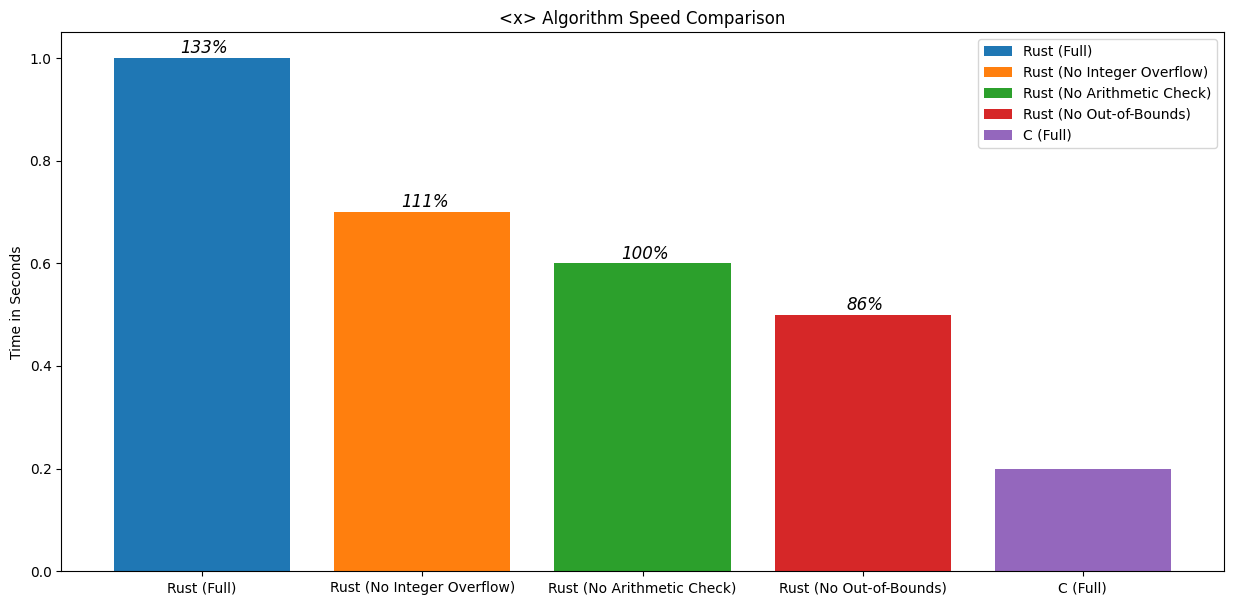

In [140]:
x = np.arange(len(df.columns))
width = 0.25
m = 0

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()

C_FULL_VAL = df["C_FULL"][0]
# Categories are R_FULL, NOINT, NOA, NOOOB, C_FULL
for i, col in enumerate(df.columns):
    bar = ax.bar(i, df[col][0], label=REAL_LABELS[col])
    value = df[col][0]

    # C is not annotated:
    if i != len(df.columns) - 1:
        # Get percentage difference:
        diff = round((abs(C_FULL_VAL-value) / ((C_FULL_VAL+value)/2)) * 100.0)
        
        percentage = ax.annotate(str(diff) + "%", xy=(i + 0.01, df[col][0]+0.009))
        percentage.set_horizontalalignment("center")
        percentage.set_fontsize("large")
        percentage.set_fontstyle("italic")

ax.set_ylabel("Time in Seconds")
ax.set_title("<x> Algorithm Speed Comparison")
ax.set_xticks(x)
ax.set_xticklabels(list(REAL_LABELS.values()))
ax.legend()


In [141]:
# rust/isolated_example/main.rs
wdf = pl.read_csv("test_ie.csv")

In [142]:
wdf

WFI,WFUI,WF,WFU
f64,f64,f64,f64
1.0,2.0,3.0,4.0
0.9,1.9,2.9,3.9
0.8,1.8,2.8,3.8


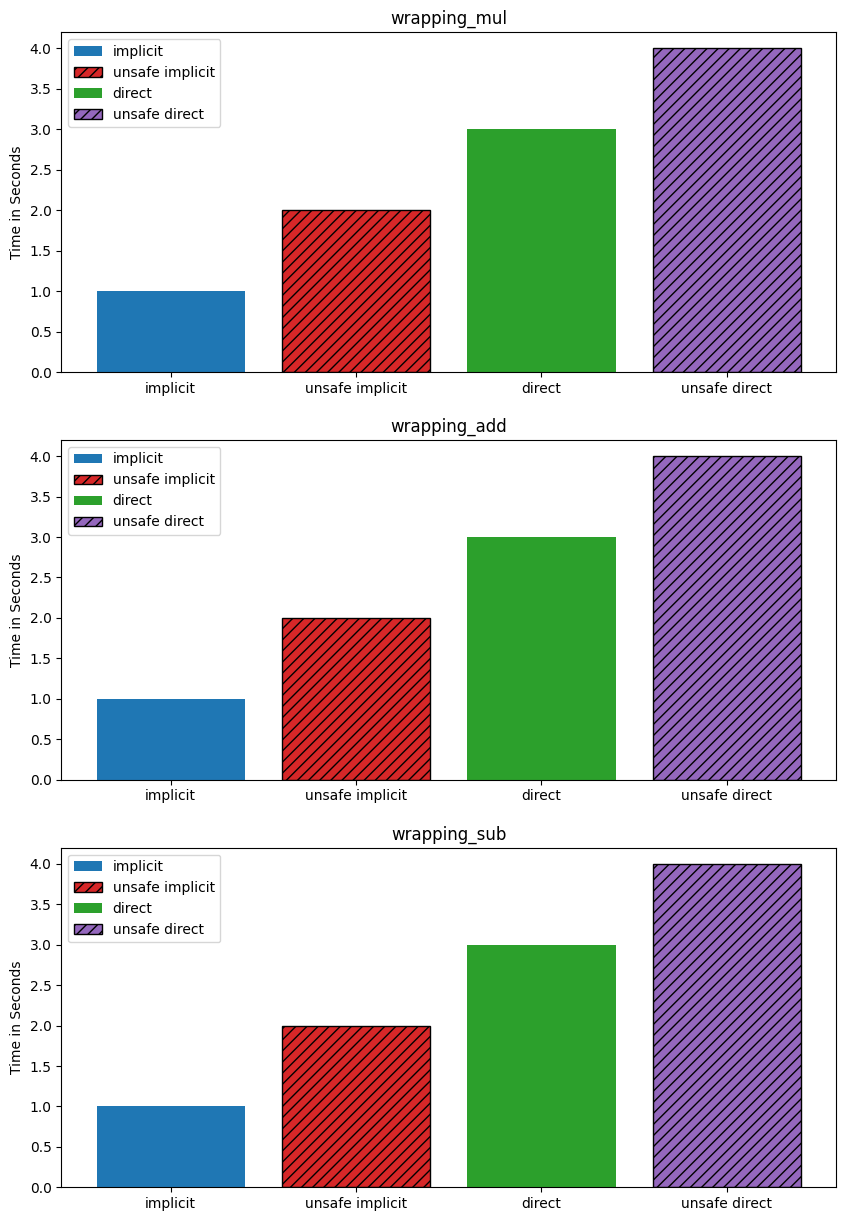

In [261]:
x = np.arange(len(df.columns))
m = 0

# fig = plt.figure(figsize=(15,7))
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# Rows are:
rows = ["wrapping_mul", "wrapping_add", "wrapping_sub"]

# Column names:
WDF_NAMES = {
    "WFI": "implicit",
    "WFUI": "unsafe implicit",
    "WF": "direct",
    "WFU": "unsafe direct",
}

bar_colors = [
    "tab:blue",
    "tab:red",
    "tab:green",
    "tab:purple",
]

for i, row in enumerate(rows):
    ax = axes[i]
    for j, col in enumerate(wdf.columns):
        bar = ax.bar(j, wdf[col][0], label=WDF_NAMES[col], color=bar_colors[j])

        # Unsafe gets hatching:
        if (j % 2 != 0):
            bar.patches[0].set_hatch("///")
            bar.patches[0].set_edgecolor("black")

    ax.set_ylabel("Time in Seconds")
    ax.set_xticks(np.arange(len(wdf.columns)))
    ax.set_xticklabels(list(WDF_NAMES.values()))
    ax.legend()
    ax.set_title(row)